In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
df_18 = pd.read_csv('../Data/Patent data - PatentsView/subset_post_2018.csv')
# df_18 = df_18.drop(['kind','filename','withdrawn'],axis=1)
len(df_18)

553433

In [7]:
# df_18.index = pd.DatetimeIndex(df_18.date)

In [23]:
subset_different

,Unnamed: 0,id,type_x,country,date,abstract,title,num_claims,assignee_id,type_y,name_first,name_last,organization,subset
id,,,,,,,,,,,,,,
10000476,489,10000476,utility,US,2018-06-19,General formula (I): The present invention per...,"Pyridone derivative, pharmaceutical containing...",5.0,org_9KrldOlPeQvphE8wupxL,3.0,NaN,NaN,"Kaken Pharmaceutical Co., Ltd.",medicine
10000554,577,10000554,utility,US,2018-06-19,A modified laminin characterized in that a lam...,Modified laminin containing collagen binding m...,9.0,org_OCJDtCTsWKVCM5EetxpF,3.0,NaN,NaN,Osaka University,medicine
10004781,4939,10004781,utility,US,2018-06-26,A prescription of intravenous medication and i...,Prescription of intravenous medication for blo...,18.0,NaN,NaN,NaN,NaN,NaN,medicine
10004909,5077,10004909,utility,US,2018-06-26,A Medical Device Application (MDA) is disclose...,Medical device application for an external dev...,17.0,org_8UGbcJ4x8s9FbVkstSyM,2.0,NaN,NaN,Boston Scientific Neuromodulation Corporation,medicine
10005727,5920,10005727,utility,US,2018-06-26,The present invention relates to a group of co...,Compound and analogues for tracing histone ace...,7.0,org_f4v5XqxWoiJwaX2UR9x3,3.0,NaN,NaN,Institute of Nuclear Energy Research Atomic En...,medicine
10005744,5939,10005744,utility,US,2018-06-26,It discloses compounds for the treatment and p...,Compounds for the treatment or prevention of b...,8.0,org_2mVfOJuqGhZiiI5znoy8,3.0,NaN,NaN,JIANGSU ATOM BIOSCIENCE AND PHARMACEUTICAL CO....,medicine
10005846,6055,10005846,utility,US,2018-06-26,The invention provides antibodies and antigen-...,Anti-transglutaminase 2 antibodies,15.0,org_yuAvfdYX3HGhzWgltVe9,3.0,NaN,NaN,LifeArc,medicine
10006080,6305,10006080,utility,US,2018-06-26,"The present invention relates to medicine, hem...",High-selectivity contact activation inhibitor ...,27.0,org_WiTD0wMaycfstxNKghed,3.0,NaN,NaN,OBSCHESTVO S OGRANICHENNOI OTVETSTVENNOSTIYU Ã...,medicine
10007764,8063,10007764,utility,US,2018-06-26,Disclosed in the present invention is a medici...,Medicine dispensing system and control method ...,18.0,org_sLUrNynI3lRxwaOn5gmv,3.0,NaN,NaN,"JVM Co., Ltd.",medicine


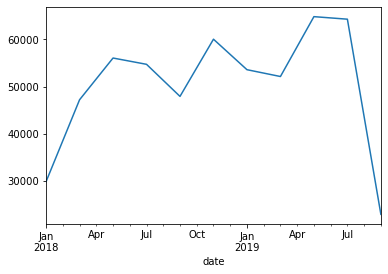

In [9]:

df_18.groupby(pd.Grouper(freq='2m')).count().id.plot()

In [98]:
df_18 = df_18[['id','type_x','country','date','abstract','title','num_claims','assignee_id','type_y','name_first','name_last','organization']]
df_18 = df_18[[type(x) == type('str') for x in df_18.abstract]]
df_18.index = df_18
df_18.to_csv('../Data/Patent data - PatentsView/subset_post_2018.csv')

In [22]:
diff_word_1 = 'medicine'
diff_word_2 = 'games'
diff_word_3 = 'glasses'

## Frekar gott
# diff_word_1 = 'drugs'
# diff_word_2 = 'keyboard'
# diff_word_3 = 'IoT'

# # Svipað gott
# diff_word_1 = 'drugs'
# diff_word_2 = 'music'
# diff_word_3 = 'IoT'

# # Næstum 100% aðskilið - BESTA so far
# diff_word_1 = 'drugs'
# diff_word_2 = 'footwear'
# diff_word_3 = 'IoT'

# Subset sem á að vera ólíkt og skipti í 3 hópa
subset_MED = df_18.loc[[diff_word_1 in x for x in df_18.abstract],df_18.columns]
subset_GA  = df_18.loc[[diff_word_2 in x for x in df_18.abstract],df_18.columns]
subset_GL  = df_18.loc[[diff_word_3 in x for x in df_18.abstract],df_18.columns]
print([len(x) for x in [subset_MED,subset_GA,subset_GL]])
subset_different = pd.DataFrame(pd.concat([subset_MED,subset_GA,subset_GL]))

subset_different['subset'] = diff_word_1
subset_different.loc[subset_GA.index,'subset'] = diff_word_2
subset_different.loc[subset_GL.index,'subset'] = diff_word_3


[651, 459, 441]


In [38]:
subset_different.to_csv('../Data/subset_different.csv')
# subset_different.to_csv('../Dash tests/Patent Demo/Data/subset_different.csv')
subset_different.iloc[:10]

,id,type_x,country,date,abstract,title,num_claims,assignee_id,type_y,name_first,name_last,organization,subset
489,10000476,utility,US,2018-06-19,General formula (I): The present invention per...,"Pyridone derivative, pharmaceutical containing...",5.0,org_9KrldOlPeQvphE8wupxL,3.0,NaN,NaN,"Kaken Pharmaceutical Co., Ltd.",medicine
577,10000554,utility,US,2018-06-19,A modified laminin characterized in that a lam...,Modified laminin containing collagen binding m...,9.0,org_OCJDtCTsWKVCM5EetxpF,3.0,NaN,NaN,Osaka University,medicine
4939,10004781,utility,US,2018-06-26,A prescription of intravenous medication and i...,Prescription of intravenous medication for blo...,18.0,NaN,NaN,NaN,NaN,NaN,medicine
5077,10004909,utility,US,2018-06-26,A Medical Device Application (MDA) is disclose...,Medical device application for an external dev...,17.0,org_8UGbcJ4x8s9FbVkstSyM,2.0,NaN,NaN,Boston Scientific Neuromodulation Corporation,medicine
5920,10005727,utility,US,2018-06-26,The present invention relates to a group of co...,Compound and analogues for tracing histone ace...,7.0,org_f4v5XqxWoiJwaX2UR9x3,3.0,NaN,NaN,Institute of Nuclear Energy Research Atomic En...,medicine
5939,10005744,utility,US,2018-06-26,It discloses compounds for the treatment and p...,Compounds for the treatment or prevention of b...,8.0,org_2mVfOJuqGhZiiI5znoy8,3.0,NaN,NaN,JIANGSU ATOM BIOSCIENCE AND PHARMACEUTICAL CO....,medicine
6055,10005846,utility,US,2018-06-26,The invention provides antibodies and antigen-...,Anti-transglutaminase 2 antibodies,15.0,org_yuAvfdYX3HGhzWgltVe9,3.0,NaN,NaN,LifeArc,medicine
6305,10006080,utility,US,2018-06-26,"The present invention relates to medicine, hem...",High-selectivity contact activation inhibitor ...,27.0,org_WiTD0wMaycfstxNKghed,3.0,NaN,NaN,OBSCHESTVO S OGRANICHENNOI OTVETSTVENNOSTIYU Ã...,medicine
8063,10007764,utility,US,2018-06-26,Disclosed in the present invention is a medici...,Medicine dispensing system and control method ...,18.0,org_sLUrNynI3lRxwaOn5gmv,3.0,NaN,NaN,"JVM Co., Ltd.",medicine
9923,10009577,utility,US,2018-06-26,An integrated home health system includes a te...,Communication systems,33.0,org_gCp5SjHJo5JXTT1XmhdN,2.0,NaN,NaN,"Comcast Cable Communications, LLC",medicine


In [40]:
sim_word_1 = 'virtual reality'
sim_word_2 = 'augmented reality'
sim_word_3 = 'blockchain'

# #overlap í drugs og surgert en IoT aðskilur sig
# sim_word_1 = 'drugs'
# sim_word_2 = 'surgery'
# sim_word_3 = 'IoT'

# Subset sem á að vera líkt en samt skiptist í 3 hópa
subset_VR = df_18.loc[[sim_word_1 in x for x in df_18.abstract]]
subset_AR = df_18.loc[[sim_word_2 in x for x in df_18.abstract]]
subset_BC = df_18.loc[[sim_word_3 in x for x in df_18.abstract]]
print([len(x) for x in [subset_VR,subset_AR,subset_BC]])
subset_similar = pd.DataFrame(pd.concat([subset_VR,subset_AR,subset_BC]))

subset_similar['subset'] = sim_word_1
subset_similar.loc[subset_AR.index,'subset'] = sim_word_2
subset_similar.loc[subset_BC.index,'subset'] = sim_word_3
# subset_similar.loc[[(('virtual reality' in x) and ('augmented reality' in x)) for x in subset_similar.abstract],'subset'] = 'both'


[548, 697, 163]


In [41]:
subset_similar.to_csv('../Data/subset_similar.csv')

In [57]:
subset_similar.date = pd.DatetimeIndex(subset_similar.date)
subset_similar.index = subset_similar.date

In [72]:
# subset_similar.groupby('assignee_id').count().id.sort_values(ascending=False)
tmp_df = subset_similar.groupby([pd.Grouper(freq='1m'),'organization']).count().id.sort_values(ascending=False).unstack(fill_value=0).stack()
x_axis = tmp_df.index.get_level_values(0).unique()

In [95]:
groups = tmp_df.index.get_level_values(1).unique()
groups
for group in groups:
    print(tmp_df[:,group])

date
2019-01-31    0
2019-06-30    0
2019-04-30    0
2019-07-31    0
2019-05-31    0
2019-08-31    0
2018-08-31    1
2019-03-31    1
2018-07-31    0
2018-01-31    0
2018-09-30    0
2018-10-31    0
2019-02-28    0
2018-06-30    0
2018-11-30    0
2018-12-31    0
2018-05-31    0
2018-02-28    0
dtype: int64
date
2019-01-31    0
2019-06-30    0
2019-04-30    0
2019-07-31    0
2019-05-31    1
2019-08-31    0
2018-08-31    0
2019-03-31    0
2018-07-31    0
2018-01-31    0
2018-09-30    0
2018-10-31    0
2019-02-28    0
2018-06-30    0
2018-11-30    0
2018-12-31    0
2018-05-31    0
2018-02-28    0
dtype: int64
date
2019-01-31    1
2019-06-30    0
2019-04-30    0
2019-07-31    1
2019-05-31    0
2019-08-31    0
2018-08-31    0
2019-03-31    0
2018-07-31    1
2018-01-31    2
2018-09-30    0
2018-10-31    0
2019-02-28    0
2018-06-30    1
2018-11-30    0
2018-12-31    1
2018-05-31    0
2018-02-28    0
dtype: int64
date
2019-01-31    0
2019-06-30    0
2019-04-30    0
2019-07-31    0
2019-05-31   

date
2019-01-31    0
2019-06-30    0
2019-04-30    0
2019-07-31    0
2019-05-31    0
2019-08-31    0
2018-08-31    0
2019-03-31    0
2018-07-31    0
2018-01-31    0
2018-09-30    0
2018-10-31    1
2019-02-28    0
2018-06-30    0
2018-11-30    0
2018-12-31    0
2018-05-31    0
2018-02-28    0
dtype: int64
date
2019-01-31    0
2019-06-30    0
2019-04-30    2
2019-07-31    0
2019-05-31    0
2019-08-31    0
2018-08-31    0
2019-03-31    0
2018-07-31    0
2018-01-31    0
2018-09-30    0
2018-10-31    0
2019-02-28    1
2018-06-30    0
2018-11-30    0
2018-12-31    0
2018-05-31    0
2018-02-28    0
dtype: int64
date
2019-01-31    0
2019-06-30    0
2019-04-30    0
2019-07-31    3
2019-05-31    1
2019-08-31    4
2018-08-31    0
2019-03-31    0
2018-07-31    0
2018-01-31    0
2018-09-30    0
2018-10-31    0
2019-02-28    0
2018-06-30    1
2018-11-30    1
2018-12-31    0
2018-05-31    0
2018-02-28    0
dtype: int64
date
2019-01-31    0
2019-06-30    0
2019-04-30    0
2019-07-31    0
2019-05-31   

In [97]:
tmp_df[:,group]

date
2019-01-31    0
2019-06-30    0
2019-04-30    1
2019-07-31    0
2019-05-31    0
2019-08-31    0
2018-08-31    0
2019-03-31    0
2018-07-31    0
2018-01-31    0
2018-09-30    0
2018-10-31    0
2019-02-28    0
2018-06-30    0
2018-11-30    1
2018-12-31    0
2018-05-31    0
2018-02-28    0
dtype: int64

# Stemming


In [ ]:
#import the nltk package
import nltk
#call the nltk downloader
# nltk.download()

In [9]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
porter = PorterStemmer()

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([porter.stem(w) for w in analyzer(doc)])

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([porter.stem(w) for w in analyzer(doc)])



[]

### Byrja á því að skoða eiginleika einstakra orða
- Fjöldi einstakra orða eftir því hvað við skoðum mörg abstracts
- Fjöldi *tilvika* einstakra orða, i.e. eru flest orðin bara tengiorð eða koma einu sinni fyrir?

In [10]:
x = [10,100,1000,10000]
y = []
for n in x:
    sub_df = df_18.iloc[:n]
    vectorizer = StemmedCountVectorizer()
    X = vectorizer.fit_transform(sub_df.abstract)
    y.append(len(vectorizer.get_feature_names()))

Text(0, 0.5, 'number of unique words')

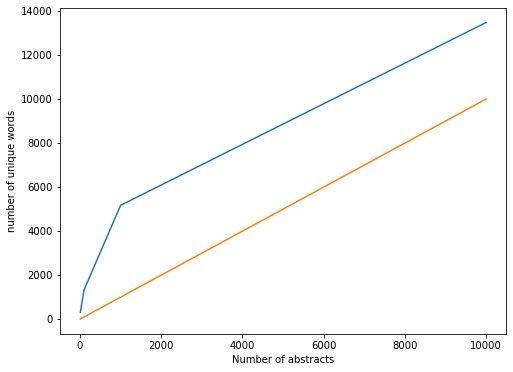

In [11]:
# Fjöldi einstakra orða sem fall af fjölda abstracta lesin
plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.plot(x,x) 
plt.xlabel('Number of abstracts')
plt.ylabel('number of unique words')

In [12]:
word_vectors = X.toarray()

Text(0.5, 0, 'word number (descending by frequency)')

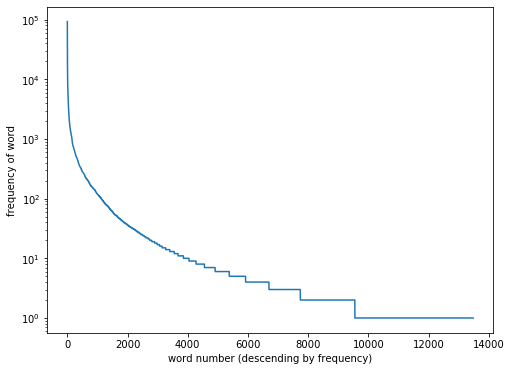

In [13]:
#Total count of each word
plt.figure(figsize=(8,6))
tmp_series = pd.Series(word_vectors.sum(axis=0))
plt.plot(tmp_series.sort_values(ascending=False).values)
plt.yscale('log')
plt.ylabel('frequency of word')
plt.xlabel('word number (descending by frequency)')


### Viljum sjá hvernig gögnin líta út þegar við hreinsum þau aðeins
#### Byrju, með 10000 staka subset og berum það saman við það sem við fengum áðan ef við gerum eftirfarandi:
- Henda út ENGLISH_STOP_WORDS (Í lagi)
- Henda út orðum sem eru ekki til í ensku með NLTK (Ekki í lagi)
- Henda út tölum (Í lagi)
- Henda út skammstöfunum (Flókið)




In [14]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sub_df = df_18.iloc[:10_000]

# max_df=0.95 (Henda orðum sem koma fyrir í 95% af öllum abstracts)
# min_df = 2 (Henda út orðum sem koma ekki oftar fyrir en 2)
# stop_words = ENGLISH_STOP_WORDS (Henda út tengiorðum)
vectorizer = StemmedCountVectorizer(max_df=0.95,min_df=2,stop_words=ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(sub_df.abstract)
unique_words = np.array(vectorizer.get_feature_names())


In [15]:
allwords = []
with open('../Data/english-words.txt', "r") as f:
    for line in f:
        allwords.extend(line.split())

In [16]:


#copy of original
short_list = unique_words

# Remove numbers (líklega frekar safe)
print('full:\n\t',len(short_list))
short_list = [w for w in short_list if not w.isdigit()]
print('after removing numbers:\n\t', len(short_list))

# Remove non-words (Getur verið issue ef orðabókin er ekki nógu ítarleg) ( Sleppa í bili )
# short_list = [w for w in short_list if wordnet.synsets(w)]


# print(len(short_list))

full:
	 7109
after removing numbers:
	 6894


In [17]:
import nltk
# nltk.download('words')
from nltk.corpus import words


In [19]:
# x = [10,50,100,300,600,1000,3000,6000,10000,12000,12000]
# y = []
# for n in x:
#     sub_df = df_18.iloc[:2*n:2]
#     vectorizer = StemmedCountVectorizer(max_df=0.95,min_df=2,stop_words=ENGLISH_STOP_WORDS)
#     X = vectorizer.fit_transform(sub_df.abstract)
#     unique_words = np.array(vectorizer.get_feature_names())
#     y.append(len(unique_words))

In [ ]:
## Fjöldi einstakra orða sem fall af fjölda abstracta lesin
plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.plot(x,x)
plt.plot(x,np.sqrt(x)*70)
plt.legend(['unique words','n_abstracts','70*sqrt(n_abstracts)'])
plt.xlabel('Number of abstracts')
plt.ylabel('number of unique words')

In [ ]:

# new_stop_words

In [20]:

from matplotlib.cm import cool

def docs_to_vecs(sub_df,additioinal_stop_words = []):
    new_stop_words = [x for x in ENGLISH_STOP_WORDS] 
    [new_stop_words.append(x) for x in additioinal_stop_words]
    vectorizer = StemmedTfidfVectorizer(max_df=0.95,min_df=2,stop_words=new_stop_words)
    X = vectorizer.fit_transform(sub_df.abstract)
    return X


from sklearn.metrics.pairwise import cosine_similarity
def Vecs_to_Sim_matrix(X):
    # Create similarity matrix
    # Ath: Erum með sparse matrix, þannig við viljum besta:
    
    Sim_matrix = cosine_similarity(X)

    # Diagonal = 0
    for i in range(0,Sim_matrix.shape[0]):
        Sim_matrix[i,i] = 0
    
    # Normalize to sum = 1
    for i in range(0,Sim_matrix.shape[0]):
        Sim_matrix[i] = Sim_matrix[i]/sum(Sim_matrix[i])
        
    return Sim_matrix



def get_coords(sub_df,X_emb):
    sub_df['x'] = X_emb[:,0]
    sub_df['y'] = X_emb[:,1]
    return sub_df


In [144]:
# diff_word_1 = 'medicine'
# diff_word_2 = 'games'
# diff_word_3 = 'glasses'

## Frekar gott
# diff_word_1 = 'drugs'
# diff_word_2 = 'keyboard'
# diff_word_3 = 'IoT'

# # Svipað gott
# diff_word_1 = 'drugs'
# diff_word_2 = 'music'
# diff_word_3 = 'IoT'

# # Næstum 100% aðskilið - BESTA so far
diff_word_1 = 'drugs'
diff_word_2 = 'footwear'
diff_word_3 = 'speech'

# Subset sem á að vera ólíkt og skipti í 3 hópa
subset_MED = df_18.loc[[diff_word_1 in x for x in df_18.title],['abstract','title']]
subset_GA  = df_18.loc[[diff_word_2 in x for x in df_18.title],['abstract','title']]
subset_GL = df_18.loc[[diff_word_3 in x for x in df_18.title],['abstract','title']]
print([len(x) for x in [subset_MED,subset_GA,subset_GL]])
subset_different = pd.DataFrame(pd.concat([subset_MED,subset_GA,subset_GL]))

subset_different['subset'] = diff_word_1
subset_different.loc[subset_GA.index,'subset'] = diff_word_2
subset_different.loc[subset_GL.index,'subset'] = diff_word_3
print(subset_different.shape)

[217, 364, 571]
(1152, 3)


In [122]:
from sklearn.manifold import TSNE

# define subset
sub_df = subset_different
# Vectorize
X = docs_to_vecs(sub_df)#,[porter.stem(diff_word_1),porter.stem(diff_word_2),porter.stem(diff_word_3)])
# print(X.shape)
# Create similarity matrix from cosine distance and change for TSNE input
Sim_matrix = Vecs_to_Sim_matrix(X)
# USE TSNE


In [123]:

tsne = TSNE(n_components=2,n_jobs=-1,verbose=2)
X_embedded = tsne.fit_transform(Sim_matrix)
print(tsne.kl_divergence_)

sub_df = get_coords(sub_df,X_embedded)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1152 samples in 0.218s...
[t-SNE] Computed neighbors for 1152 samples in 0.535s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1152
[t-SNE] Computed conditional probabilities for sample 1152 / 1152
[t-SNE] Mean sigma: 0.011807
[t-SNE] Computed conditional probabilities in 0.061s
[t-SNE] Iteration 50: error = 72.4599457, gradient norm = 0.2617650 (50 iterations in 0.301s)
[t-SNE] Iteration 100: error = 72.0556793, gradient norm = 0.2591279 (50 iterations in 0.280s)
[t-SNE] Iteration 150: error = 71.7448654, gradient norm = 0.2820403 (50 iterations in 0.289s)
[t-SNE] Iteration 200: error = 73.3991394, gradient norm = 0.2681812 (50 iterations in 0.311s)
[t-SNE] Iteration 250: error = 72.0843887, gradient norm = 0.2775984 (50 iterations in 0.299s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.084389
[t-SNE] Iteration 300: error = 1.2266710, gradient norm = 0.0027381 (50 iterations in 0.266s)

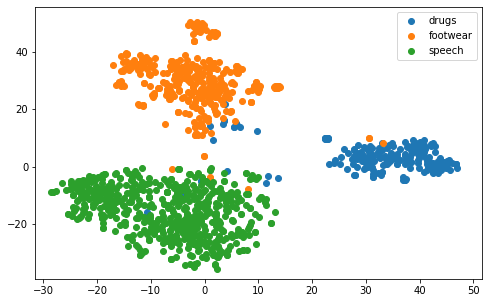

In [124]:
#plot
plt.figure(figsize=(8,5))
plt.xlim(min(sub_df['x']*1.1),max(sub_df['x'])*1.1)
plt.ylim(min(sub_df['y']*1.1),max(sub_df['y'])*1.1)
for u_word in sub_df['subset'].unique():
    plt.scatter(sub_df[[x == u_word for x in sub_df['subset']]]['x'],
                sub_df[[x == u_word for x in sub_df['subset']]]['y'])
plt.legend(sub_df['subset'].unique())
plt.show()

In [ ]:
# start = time.time()
# tsne = TSNE(n_components=2,n_jobs=-1)
# start2 = time.time()

# pca_n_comp = 100
# new_input = PCA(n_components=pca_n_comp).fit_transform(Sim_matrix)
# end2 = time.time()
# print('PCA with n_components=%s:'%(pca_n_comp),end2-start2)

# start3= time.time()
# X_embedded = tsne.fit_transform(new_input)
# end3= time.time()

# print('TSNE with N=%s:'%(size),end3-start3)
# print(tsne.kl_divergence_)

# sub_df = get_coords(sub_df,X_embedded)
# end = time.time()
# print(end-start)


In [ ]:
# #plot
plt.figure(figsize=(12,8))
plt.xlim(min(sub_df['x']*1.1),max(sub_df['x'])*1.1)
plt.ylim(min(sub_df['y']*1.1),max(sub_df['y'])*1.1)
for u_word in sub_df['subset'].unique():
    plt.scatter(sub_df[[x == u_word for x in sub_df['subset']]]['x'],
                sub_df[[x == u_word for x in sub_df['subset']]]['y'])
plt.legend(sub_df['subset'].unique())
plt.show()

In [143]:
# sim_word_1 = 'virtual reality'
# sim_word_2 = 'augmented reality'
# sim_word_3 = 'blockchain'

# #overlap í drugs og surgert en IoT aðskilur sig
sim_word_1 = 'drugs'
sim_word_2 = 'surgery'
sim_word_3 = 'physiological'

# Subset sem á að vera líkt en samt skiptist í 3 hópa
subset_VR = df_18.loc[[sim_word_1 in x for x in df_18.title],['abstract','title']]
subset_AR = df_18.loc[[sim_word_2 in x for x in df_18.title],['abstract','title']]
subset_BC = df_18.loc[[sim_word_3 in x for x in df_18.title],['abstract','title']]
print([len(x) for x in [subset_VR,subset_AR,subset_BC]])
subset_similar = pd.DataFrame(pd.concat([subset_VR,subset_AR,subset_BC]))

subset_similar['subset'] = sim_word_1
subset_similar.loc[subset_AR.index,'subset'] = sim_word_2
subset_similar.loc[subset_BC.index,'subset'] = sim_word_3
# subset_similar.loc[[(('virtual reality' in x) and ('augmented reality' in x)) for x in subset_similar.abstract],'subset'] = 'both'
print(subset_similar.shape)

[217, 374, 301]
(892, 3)


In [134]:
from sklearn.manifold import TSNE

# define subset
sub_df = subset_similar
# Vectorize
X = docs_to_vecs(sub_df)#,[porter.stem(sim_word_1),porter.stem(sim_word_2),porter.stem(sim_word_3)])
# print(X.shape)
# Create similarity matrix from cosine distance and change for TSNE input
Sim_matrix = Vecs_to_Sim_matrix(X)
# Sim_matrix = X.toarray()
# USE TSNE

tsne =  TSNE(n_components=2,n_jobs=-1,verbose=2)
X_embedded = tsne.fit_transform(Sim_matrix)
print(tsne.kl_divergence_)

sub_df = get_coords(sub_df,X_embedded)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 892 samples in 0.114s...
[t-SNE] Computed neighbors for 892 samples in 0.207s...
[t-SNE] Computed conditional probabilities for sample 892 / 892
[t-SNE] Mean sigma: 0.015223
[t-SNE] Computed conditional probabilities in 0.042s
[t-SNE] Iteration 50: error = 78.0635147, gradient norm = 0.3051977 (50 iterations in 0.263s)
[t-SNE] Iteration 100: error = 78.4667816, gradient norm = 0.3113477 (50 iterations in 0.247s)
[t-SNE] Iteration 150: error = 78.7496948, gradient norm = 0.3236769 (50 iterations in 0.236s)
[t-SNE] Iteration 200: error = 80.9345703, gradient norm = 0.3216600 (50 iterations in 0.215s)
[t-SNE] Iteration 250: error = 81.3596497, gradient norm = 0.3069194 (50 iterations in 0.221s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.359650
[t-SNE] Iteration 300: error = 1.2944789, gradient norm = 0.0061145 (50 iterations in 0.246s)
[t-SNE] Iteration 350: error = 1.1762863, gradient norm = 0.0007489 (

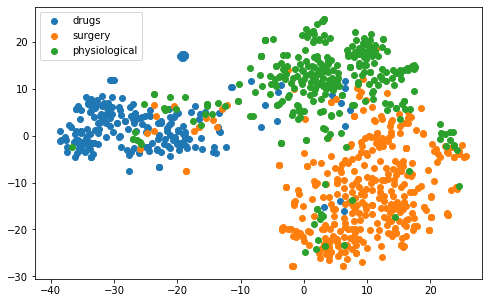

In [135]:

#plot
plt.figure(figsize=(8,5))
plt.xlim(min(sub_df['x']*1.1),max(sub_df['x'])*1.1)
plt.ylim(min(sub_df['y']*1.1),max(sub_df['y'])*1.1)
for u_word in sub_df['subset'].unique():
    plt.scatter(sub_df[[x == u_word for x in sub_df['subset']]]['x'],
                sub_df[[x == u_word for x in sub_df['subset']]]['y'])
plt.legend(sub_df['subset'].unique())
plt.show()

NameError: name 'X' is not defined

In [145]:

from sklearn.manifold import TSNE

# define subset
sub_df = pd.concat([subset_different,subset_similar],sort=False)
# Vectorize
X = docs_to_vecs(sub_df,[porter.stem(diff_word_1),porter.stem(diff_word_2),porter.stem(diff_word_3),porter.stem(sim_word_1),porter.stem(sim_word_2),porter.stem(sim_word_3)])
print(X.shape)
# Create similarity matrix from cosine distance and change for TSNE input
Sim_matrix = Vecs_to_Sim_matrix(X)
# USE TSNE

tsne = TSNE(n_components=2,n_jobs=-1,verbose=2)
X_embedded = tsne.fit_transform(Sim_matrix)

sub_df = get_coords(sub_df,X_embedded)




(2044, 3542)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2044 samples in 0.852s...
[t-SNE] Computed neighbors for 2044 samples in 3.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2044
[t-SNE] Computed conditional probabilities for sample 2000 / 2044
[t-SNE] Computed conditional probabilities for sample 2044 / 2044
[t-SNE] Mean sigma: 0.010828
[t-SNE] Computed conditional probabilities in 0.104s
[t-SNE] Iteration 50: error = 74.8037872, gradient norm = 0.1866817 (50 iterations in 0.687s)
[t-SNE] Iteration 100: error = 73.4359436, gradient norm = 0.1575080 (50 iterations in 0.632s)
[t-SNE] Iteration 150: error = 73.9031219, gradient norm = 0.1786180 (50 iterations in 0.704s)
[t-SNE] Iteration 200: error = 74.9722824, gradient norm = 0.1466388 (50 iterations in 0.679s)
[t-SNE] Iteration 250: error = 73.6014175, gradient norm = 0.1707008 (50 iterations in 0.634s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.601418
[t-SNE] Iterat

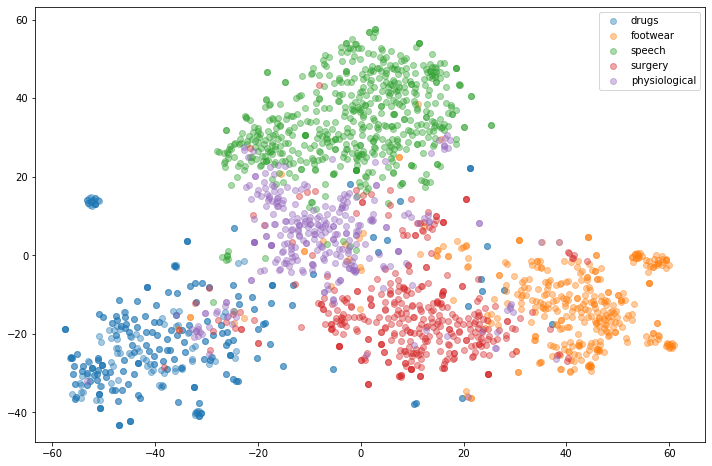

In [146]:
plt.figure(figsize=(12,8))
plt.xlim(min(sub_df['x']*1.1),max(sub_df['x'])*1.1)
plt.ylim(min(sub_df['y']*1.1),max(sub_df['y'])*1.1)


for u_word in sub_df['subset'].unique():
    plt.scatter(sub_df[[x == u_word for x in sub_df['subset']]]['x'],
                sub_df[[x == u_word for x in sub_df['subset']]]['y'],alpha=0.4)

plt.legend(sub_df['subset'].unique())
plt.show()

In [ ]:
for u_word in sub_df['subset'].unique():
    plt.title(u_word)
    plt.scatter(sub_df[[x != u_word for x in sub_df['subset']]]['x'],
                sub_df[[x != u_word for x in sub_df['subset']]]['y'],alpha=0.5)
    plt.scatter(sub_df[[x == u_word for x in sub_df['subset']]]['x'],
                sub_df[[x == u_word for x in sub_df['subset']]]['y'],alpha=0.5)
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [90]:
def sort_vocab(dic):
#     print(dic)
    n = len(dic)
    str_list = []
    num_list = []
    for i in dic:
        str_list.append(i)
        num_list.append(dic[i])
    ret_list = np.array(str_list)[np.argsort(num_list)]
    test_list = np.array(num_list)[np.argsort(num_list)]
    
    return ret_list

In [ ]:
# tmp_subset

In [91]:
tmp_subset = subset_different#[subset_similar.subset != 'Blockchain']

df_100_most_common = pd.DataFrame()


for field in tmp_subset.subset.unique():
    new_stop_words = list(ENGLISH_STOP_WORDS)
    [new_stop_words.append(y) for y in [porter.stem(diff_word_1),porter.stem(diff_word_2),porter.stem(diff_word_3)]]
    
    vectorizer = StemmedCountVectorizer(stop_words=new_stop_words)
    X = vectorizer.fit_transform(tmp_subset[tmp_subset.subset == field].abstract)
    dictionary = sort_vocab(vectorizer.vocabulary_)
    word_vecs = X.toarray()
    word_freq = word_vecs.sum(axis=0)
    word_sort = np.argsort(word_freq)
    
    S_dict = pd.Series(dictionary[word_sort][::-1])
    S_freq = pd.Series(word_freq[word_sort][::-1])
    
#     print(S_dict.shape)
#     print(S_freq.shape)
#     print(S_dict)
#     print(S_freq)
    tmp_df = pd.DataFrame([S_dict,S_freq]).T
    tmp_df.columns = [field,field+' number']
    df_100_most_common[field] = tmp_df[field].iloc[:100]
    df_100_most_common[field+' number'] = tmp_df[field+' number'].iloc[:100]
    
print(df_100_most_common.iloc[:60])

         drugs drugs number    footwear footwear number      speech  \
0         drug          886      includ             970        user   
1          use          796        sole             700       devic   
2       method          763      articl             698      signal   
3       invent          649     portion             653      includ   
4     compound          640       upper             554       audio   
5       provid          615      member             550        data   
6     composit          501    structur             464      method   
7   pharmaceut          462      surfac             376    recognit   
8      present          449      second             360        base   
9      thereof          388     element             358         use   
10       relat          380      compon             321      receiv   
11      diseas          373        foot             289       input   
12      includ          367        form             262    determin   
13    